# Project One: Data Visualization, Descriptive Statistics, Confidence Intervals

This notebook contains the step-by-step directions for Project One. It is very important to run through the steps in order. Some steps depend on the outputs of earlier steps. Once you have completed the steps in this notebook, be sure to write your summary report. 


You are a data analyst for a basketball team and have access to a large set of historical data that you can use to analyze performance patterns. The coach of the team and your management have requested that you use descriptive statistics and data visualization techniques to study distributions of key performance metrics that are included in the data set. These data-driven analytics will help make key decisions to improve the performance of the team. You will use the Python programming language to perform the statistical analyses and then prepare a report of your findings to present for the team’s management. Since the managers are not data analysts, you will need to interpret your findings and describe their practical implications. 


There are four important variables in the data set that you will study in Project One. 

| <div style="text-align: left"> Variable </div>  |   <div style="text-align: left"> What does it represent? </div> |
| -- | --  |
| <div style="text-align: left"> pts </div> | <div style="text-align: left"> Points scored by the team in a game </div> |
| <div style="text-align: left"> elo_n </div> | <div style="text-align: left"> A measure of the relative skill level of the team in the league </div> |
| <div style="text-align: left"> year_id </div> | <div style="text-align: left"> Year when the team played the games </div> |
| <div style="text-align: left"> fran_id </div> | <div style="text-align: left"> Name of the NBA team </div> |
| <div style="text-align: left"> game_location </div> | <div style="text-align: left"> H=Home   A=Away </div> |


The ELO rating, represented by the variable **elo_n**, is used as a measure of the relative skill of a team. This measure is inferred based on the final score of a game, the game location, and the outcome of the game relative to the probability of that outcome. The higher the number, the higher  the relative skill of a team.


In addition to studying data on your own team, your management has assigned you a second team so that you can compare its performance with your own team's. 

| <div style="text-align: left"> Team </div>  |   <div style="text-align: left"> What does it represent? </div> |
| -- | --  |
| <div style="text-align: left"> Your Team </div> | <div style="text-align: left"> This is the team that has hired you as an analyst. This is the team that you will pick below. See Step 2.</div> |
| <div style="text-align: left"> Assigned Team </div> | <div style="text-align: left"> This is the team that the management has assigned to you to compare against your team. See Step 1. </div> |


Reminder: It may be beneficial to review the summary report template for Project One prior to starting this Python script. That will give you an idea of the questions you will need to answer with the outputs of this script.


**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Step 1: Data Preparation & the Assigned Team
This step uploads the data set from a CSV file. It also selects the assigned team for this analysis. Do not make any changes to the code block below.

1. The **assigned team** is the <font color='blue'><strong>Chicago Bulls</strong></font> from the years <font color='blue'><strong>1996-1998</strong> </font>

Click the block of code below and hit the **Run** button above.

In [6]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from IPython.display import display, HTML

nba_orig_df = pd.read_csv('nbaallelo.csv')
nba_orig_df = nba_orig_df[(nba_orig_df['lg_id']=='NBA') & (nba_orig_df['is_playoffs']==0)]
columns_to_keep = ['game_id','year_id','fran_id','pts','opp_pts','elo_n','opp_elo_n', 'game_location', 'game_result']
nba_orig_df = nba_orig_df[columns_to_keep]

# The dataframe for the assigned team is called assigned_team_df. 
# The assigned team is the Chicago Bulls from 1996-1998.
assigned_years_league_df = nba_orig_df[(nba_orig_df['year_id'].between(1996, 1998))]
assigned_team_df = assigned_years_league_df[(assigned_years_league_df['fran_id']=='Bulls')]
assigned_team_df = assigned_team_df.reset_index(drop=True)

display(HTML(assigned_team_df.head().to_html()))
print("printed only the first five observations...")
print("Number of rows in the data set =", len(assigned_team_df))

,game_id,year_id,fran_id,pts,opp_pts,elo_n,opp_elo_n,game_location,game_result
0,199511030CHI,1996,Bulls,105,91,1598.2924,1531.7449,H,W
1,199511040CHI,1996,Bulls,107,85,1604.3940,1458.6415,H,W
2,199511070CHI,1996,Bulls,117,108,1605.7983,1310.9349,H,W
3,199511090CLE,1996,Bulls,106,88,1618.8701,1452.8268,A,W
4,199511110CHI,1996,Bulls,110,106,1621.1591,1490.2861,H,W


printed only the first five observations...
Number of rows in the data set = 246


## Step 2: Pick Your Team
In this step, you will pick your team. The range of years that you will study for your team is <font color='blue'><strong>2013-2015</strong></font>. Make the following edits to the code block below:

1. <font color='red'> Replace <strong>??TEAM??</strong> with your choice of team from one of the following team names. </font>  
<font color='blue'>*Bucks, Bulls, Cavaliers, Celtics, Clippers, Grizzlies, Hawks, Heat, Jazz, Kings, Knicks, Lakers, Magic, Mavericks, Nets, Nuggets, Pacers, Pelicans, Pistons, Raptors, Rockets, Sixers, Spurs, Suns, Thunder, Timberwolves, Trailblazers, Warriors, Wizards*</font>    
Remember to enter the team name within single quotes. For example, if you picked the Suns, then ??TEAM?? should be replaced with 'Suns'.  

After you are done with your edits, click the block of code below and hit the **Run** button above.

In [7]:
# Range of years: 2013-2015 (Note: The line below selects ALL teams within the three-year period 2013-2015. This is not your team's dataframe.
your_years_leagues_df = nba_orig_df[(nba_orig_df['year_id'].between(2013, 2015))]

# The dataframe for your team is called your_team_df.
# ---- TODO: make your edits here ----
your_team_df = your_years_leagues_df[(your_years_leagues_df['fran_id']== 'Celtics')]
your_team_df = your_team_df.reset_index(drop=True)

display(HTML(your_team_df.head().to_html()))
print("printed only the first five observations...")
print("Number of rows in the data set =", len(your_team_df))

,game_id,year_id,fran_id,pts,opp_pts,elo_n,opp_elo_n,game_location,game_result
0,201210300MIA,2013,Celtics,107,120,1586.1121,1666.3193,A,L
1,201211020BOS,2013,Celtics,88,99,1566.8929,1520.3861,H,L
2,201211030WAS,2013,Celtics,89,86,1571.9491,1435.2531,A,W
3,201211070BOS,2013,Celtics,100,94,1574.5995,1432.6027,H,W
4,201211090BOS,2013,Celtics,100,106,1562.3982,1541.7600,H,L


printed only the first five observations...
Number of rows in the data set = 245


## Step 3: Data Visualization: Points Scored by Your Team
The coach has requested that you provide a visual that shows the distribution of points scored by your team in the years 2013-2015. The code below provides two possible options. Pick **ONE** of these two plots to include in your summary report. Choose the plot that you think provides the best visual for the distribution of points scored by your team. In your summary report, you must explain why you think your visual is the best choice.


Click the block of code below and hit the **Run** button above.  
NOTE: If the plots are not created, click the code section and hit the **Run** button again.

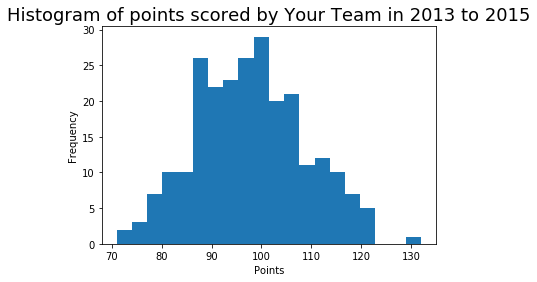

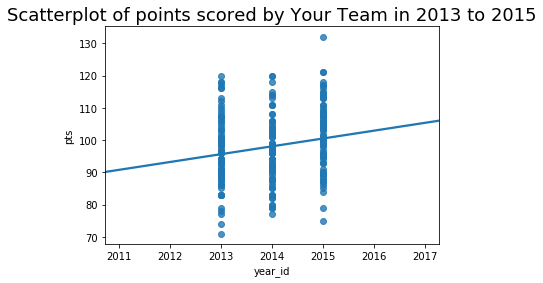

In [4]:
import seaborn as sns

# Histogram
fig, ax = plt.subplots()
plt.hist(your_team_df['pts'], bins=20)
plt.title('Histogram of points scored by Your Team in 2013 to 2015', fontsize=18)
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')
plt.show()
print("")

# Scatterplot
plt.title('Scatterplot of points scored by Your Team in 2013 to 2015', fontsize=18)
sns.regplot(your_team_df['year_id'], your_team_df['pts'], ci=None)
plt.show()

## Step 4: Data Visualization: Points Scored by the Assigned Team
The coach has also requested that you provide a visual that shows a distribution of points scored by the Bulls from years 1996-1998. The code below provides two possible options. Pick **ONE** of these two plots to include in your summary report. Choose the plot that you think provides the best visual for the distribution of points scored by your team. In your summary report, you will explain why you think your visual is the best choice.


Click the block of code below and hit the **Run** button above.  
NOTE: If the plots are not created, click the code section and hit the **Run** button again.

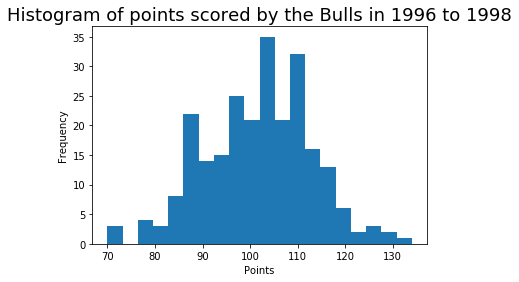

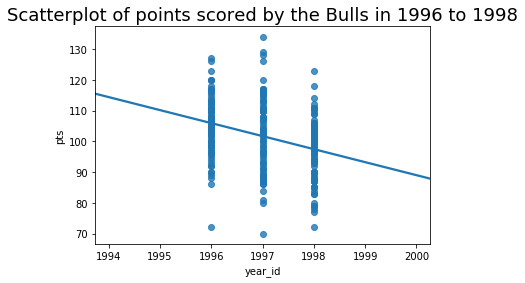

In [5]:
import seaborn as sns

# Histogram
fig, ax = plt.subplots()
plt.hist(assigned_team_df['pts'], bins=20)
plt.title('Histogram of points scored by the Bulls in 1996 to 1998', fontsize=18)
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')
plt.show()

# Scatterplot
plt.title('Scatterplot of points scored by the Bulls in 1996 to 1998', fontsize=18)
sns.regplot(assigned_team_df['year_id'], assigned_team_df['pts'], ci=None)
plt.show()

## Step 5: Data Visualization: Comparing the Two Teams
Now the coach wants you to prepare one plot that provides a visual of the differences in the distribution of points scored by the assigned team and your team. The code below provides two possible visuals. Choose the plot that allows for the best comparison of the data distributions.


Click the block of code below and hit the **Run** button above.  
NOTE: If the plots are not created, click the code section and hit the **Run** button again.

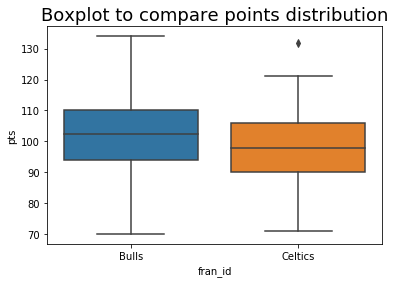

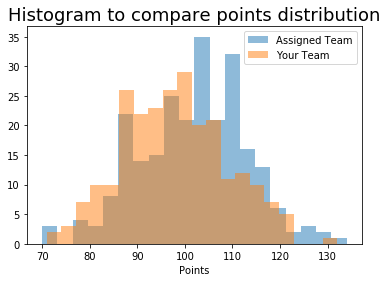

In [6]:
import seaborn as sns

# Side-by-side boxplots
both_teams_df = pd.concat((assigned_team_df, your_team_df))
plt.title('Boxplot to compare points distribution', fontsize=18) 
sns.boxplot(x='fran_id',y='pts',data=both_teams_df)
plt.show()
print("")

# Histograms
fig, ax = plt.subplots()
plt.hist(assigned_team_df['pts'], 20, alpha=0.5, label='Assigned Team')
plt.hist(your_team_df['pts'], 20, alpha=0.5, label='Your Team')
plt.title('Histogram to compare points distribution', fontsize=18) 
plt.xlabel('Points')
plt.legend(loc='upper right')
plt.show()

## Step 6: Descriptive Statistics: Points Scored By Your Time in Home Games
The management of your team wants you to run descriptive statistics on the points scored by your team in the games played at your team's venue in 2013-2015. Calculate descriptive statistics including the mean, median, variance, and standard deviation for points scored by your team played at Home. Make the following edits to the code block below:

1. <font color='red'> Replace <strong>??MEAN_FUNCTION??</strong> with the name of Python function that calculates the mean. </font>
2. <font color='red'> Replace <strong>??MEDIAN_FUNCTION??</strong> with the name of Python function that calculates the median. </font>
3. <font color='red'> Replace <strong>??VAR_FUNCTION??</strong> with the name of Python function that calculates the variance. </font>
4. <font color='red'> Replace <strong>??STD_FUNCTION??</strong> with the name of Python function that calculates the standard deviation. </font>

After you are done with your edits, click the block of code below and hit the **Run** button above.

In [10]:
print("Points Scored by Your Team in Home Games (2013 to 2015)")
print("-------------------------------------------------------")

your_team_home_df = your_team_df[your_team_df['game_location']=='H'].copy()

# ---- TODO: make your edits here ----
mean = your_team_home_df['pts'].mean()
median = your_team_home_df['pts'].median()
variance = your_team_home_df['pts'].var()
stdeviation = your_team_home_df['pts'].std()

print('Mean =', round(mean,2))
print('Median =', round(median,2))
print('Variance =', round(variance,2))
print('Standard Deviation =', round(stdeviation,2))

Points Scored by Your Team in Home Games (2013 to 2015)
-------------------------------------------------------
Mean = 98.82
Median = 99.5
Variance = 107.67
Standard Deviation = 10.38


## Step 7 - Descriptive Statistics - Points Scored By Your Time in Away Games
The management also wants you to run descriptive statistics on the points scored by your team in games played at opponent's venue (Away) in 2013-2015. They want you to analyze measures of central tendency (e.g. mean, median) and measures of spread (e.g. standard deviation) in explaining if the team is doing better in Home games compared to Away games. Calculate descriptive statistics including the mean, median, variance, and standard deviation for points scored by your team played in opponent's venue (Away). Make the following edits to the code block below: 

<font><strong>You are to write this code block yourself.</strong></font> 

Use Step 6 to help you write this code block. Here is some information that will help you write this code block.
1. <font color='red'> Since you are calculating statistics for games played at opponent's venue, game_location variable should be set to 'A'. </font>
2. <font color='red'> Functions for all statistics are the same as those in step 6. </font>
3. <font color='red'> Your statistics should be rounded to two decimal places. </font>

Write your code in the code block section below. After you are done, click this block of code and hit the **Run** button above. Reach out to your instructor if you need more help with this step.

In [11]:
# Write your code in this code block. 
print("Points Scored by Your Team in Away Games (2013 to 2015)")
print("-------------------------------------------------------")

your_team_home_df = your_team_df[your_team_df['game_location']=='A'].copy()

# ---- TODO: make your edits here ----
mean_A = your_team_home_df['pts'].mean()
median_A = your_team_home_df['pts'].median()
variance_A = your_team_home_df['pts'].var()
stdeviation_A = your_team_home_df['pts'].std()

print('Mean =', round(mean_A,2))
print('Median =', round(median_A,2))
print('Variance =', round(variance_A,2))
print('Standard Deviation =', round(stdeviation_A,2))


Points Scored by Your Team in Away Games (2013 to 2015)
-------------------------------------------------------
Mean = 97.28
Median = 96.0
Variance = 121.43
Standard Deviation = 11.02


## Step 8: Confidence Intervals for the Average Relative Skill of All Teams in Your Team's Years
The management wants to you to calculate a 95% confidence interval for the average relative skill of all teams in 2013-2015. You will use the variable 'elo_n' to respresent the relative skill of the teams. To construct a confidence interval, you will need the mean and standard error of the relative skill level in these years. The code block below calculates the mean and the standard deviation. Your edits will calculate the standard error and the confidence interval. Make the following edits to the code block below:

1. <font color='red'> Replace <strong>??SD_VARIABLE??</strong> with the variable name representing the standard deviation of relative skill of all teams from your years. </font> (Hint: the *standard deviation* variable is in the code block below)
2. <font color='red'> Replace <strong>??CL??</strong> with the confidence level of the confidence interval. </font>
3. <font color='red'> Replace <strong>??MEAN_VARIABLE??</strong> with the variable name representing the mean relative skill of all teams from your years. </font> (Hint: the *mean* variable is in the code block below)
4. <font color='red'> Replace <strong>??SE_VARIABLE??</strong> with the variable name representing the standard error. </font> (Hint: the *standard error* variable is in the code block below)


The management also wants you to calculate the probability that a team in the league has a relative skill level less than that of the team that you picked. Assuming that the relative skill of teams is Normally distributed, Python methods for a Normal distribution can be used to answer this question. The code block below uses two of these Python methods. Your task is to identify the correct Python method and report the probability. 

After you are done with your edits, click the block of code below and hit the **Run** button above.

In [8]:
print("Confidence Interval for Average Relative Skill in the years 2013 to 2015")
print("------------------------------------------------------------------------------------------------------------")

# Mean relative skill of all teams from the years 2013-2015
mean = your_years_leagues_df['elo_n'].mean()

# Standard deviation of the relative skill of all teams from the years 2013-2015
stdev = your_years_leagues_df['elo_n'].std()

n = len(your_years_leagues_df)

#Confidence interval
# ---- TODO: make your edits here ----
stderr = stdev/(n ** 0.5)
conf_int_95 = st.norm.interval(0.95, mean, stderr)

print("95% confidence interval (unrounded) for Average Relative Skill (ELO) in the years 2013 to 2015 =", conf_int_95)
print("95% confidence interval (rounded) for Average Relative Skill (ELO) in the years 2013 to 2015 = (",  round(conf_int_95[0], 2),",", round(conf_int_95[1], 2),")")


print("\n")
print("Probability a team has Average Relative Skill LESS than the Average Relative Skill (ELO) of your team in the years 2013 to 2015")
print("----------------------------------------------------------------------------------------------------------------------------------------------------------")

mean_elo_your_team = your_team_df['elo_n'].mean()

choice1 = st.norm.sf(mean_elo_your_team, mean, stdev)
choice2 = st.norm.cdf(mean_elo_your_team, mean, stdev) #This option return the probability of Z being less or equal. 

# Pick the correct answer.
print("Which of the two choices is correct?")
print("Choice 1 =", round(choice1,4))
print("Choice 2 =", round(choice2,4))

Confidence Interval for Average Relative Skill in the years 2013 to 2015
------------------------------------------------------------------------------------------------------------
95% confidence interval (unrounded) for Average Relative Skill (ELO) in the years 2013 to 2015 = (1502.0236894390478, 1507.1824625533618)
95% confidence interval (rounded) for Average Relative Skill (ELO) in the years 2013 to 2015 = ( 1502.02 , 1507.18 )


Probability a team has Average Relative Skill LESS than the Average Relative Skill (ELO) of your team in the years 2013 to 2015
----------------------------------------------------------------------------------------------------------------------------------------------------------
Which of the two choices is correct?
Choice 1 = 0.6639
Choice 2 = 0.3361


## Step 9 - Confidence Intervals  for the Average Relative Skill of All Teams in the Assigned Team's Years
The management also wants to you to calculate a 95% confidence interval for the average relative skill of all teams in the years 1996-1998. Calculate this confidence interval. 

<font><strong>You are to write this code block yourself.</strong></font> 

Use Step 8 to help you write this code block. Here is some information that will help you write this code block. Reach out to your instructor if you need help.

1. <font color='red'> The dataframe for the years 1996-1998 is called assigned_years_league_df </font>
2. <font color='red'> The variable 'elo_n' represents the relative skill of teams. </font>
3. <font color='red'> Start by calculating the mean and the standard deviation of relative skill (ELO) in years 1996-1998. </font>
4. <font color='red'> Calculate n that represents the sample size. </font>
5. <font color='red'> Calculate the standard error which is equal to the standard deviation of Relative Skill (ELO) divided by the square root of the sample size n. </font>
6. <font color='red'>  Assuming that the population standard deviation is known, use Python methods for the Normal distribution to calculate the confidence interval. </font>
7. <font color='red'> Your statistics should be rounded to two decimal places. </font>

The management also wants you to calculate the probability that a team had a relative skill level less than the Bulls in years 1996-1998. Assuming that the relative skill of teams is Normally distributed, calculate this probability. 

<font><strong>You are to write this code block yourself.</strong></font> 

Use Step 8 to help you write this code block. Here is some information that will help you write this code block.

1. <font color='red'> Calculate the mean relative skill of the Bulls. Note that the dataframe for the Bulls is called assigned_team_df. The variable 'elo_n' represents the relative skill. </font>
2. <font color='red'> Use Python methods for a Normal distribution to calculate this probability. </font>
3. <font color='red'> The probability value should be rounded to four decimal places. </font>


Write your code in the code block section below. After you are done, click this block of code and hit the **Run** button above. Reach out to your instructor if you need more help with this step.

In [12]:
# Write your code in this code block section
print("Confidence Interval for Average Relative Skill in the years 1996 to 1998")
print("------------------------------------------------------------------------------------------------------------")

# Mean relative skill of all teams from the years 1996 to 1998
mean_assigned_team_league = assigned_years_league_df['elo_n'].mean()

# Standard deviation of the relative skill of all teams from the years 1996 to 1998
stdev_assigned_years_league_df = assigned_years_league_df['elo_n'].std()

n_assigned_team_league = len(assigned_years_league_df)

#Confidence interval
stderr_assigned_team_league = stdev_assigned_years_league_df/(n_assigned_team_league ** 0.5)
conf_int_95_assigned_team_league = st.norm.interval(0.95, mean_assigned_team_league, stderr_assigned_team_league)

print("95% confidence interval (unrounded) for Average Relative Skill (ELO) in the years 1996 to 1998 =", conf_int_95_assigned_team_league)
print("95% confidence interval (rounded) for Average Relative Skill (ELO) in the years 1996 to 1998 = (",  round(conf_int_95_assigned_team_league[0], 2),",", round(conf_int_95_assigned_team_league[1], 2),")")


print("\n")
print("Probability a team has Average Relative Skill LESS than the Average Relative Skill (ELO) of your team in the years 1996 to 1998")
print("----------------------------------------------------------------------------------------------------------------------------------------------------------")

#Bull's ELO mean
mean_elo_assigned_team= assigned_team_df['elo_n'].mean() 

probability = st.norm.cdf(mean_elo_assigned_team, mean_assigned_team_league, stdev_assigned_years_league_df) #This option return the probability of Z being less or equal. 

# Print the probability of a given team have an average skill being less or equal to the Bull'S TEAM
print("Probability =", round(probability,4))


Confidence Interval for Average Relative Skill in the years 1996 to 1998
------------------------------------------------------------------------------------------------------------
95% confidence interval (unrounded) for Average Relative Skill (ELO) in the years 1996 to 1998 = (1487.6565859527095, 1493.6465501840999)
95% confidence interval (rounded) for Average Relative Skill (ELO) in the years 1996 to 1998 = ( 1487.66 , 1493.65 )


Probability a team has Average Relative Skill LESS than the Average Relative Skill (ELO) of your team in the years 1996 to 1998
----------------------------------------------------------------------------------------------------------------------------------------------------------
Probability = 0.9732


## End of Project One
Download the HTML output and submit it with your summary report for Project One. The HTML output can be downloaded by clicking **File**, then **Download as**, then **HTML**. Do not include the Python code within your summary report.